In [1]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

Этот учебник использует данные о качестве воздуха о NO2и твердые частицы размером менее 2,5 микрометров, предоставленные openaq и использующие пакет py-openaq . Набор air_quality_long.csvданных обеспечиваетNO2 и PM25значения для измерительных станций FR04014 , BETR801 и London Westminster соответственно в Париже, Антверпене и Лондоне.

Набор данных о качестве воздуха имеет следующие столбцы:

city: город, в котором используется датчик, Париж, Антверпен или Лондон

страна: страна, в которой используется датчик, FR, BE или GB

местоположение: идентификатор датчика, либо FR04014 , BETR801 или Лондон Вестминстер

параметр: параметр, измеряемый датчиком, либо NO2 или твердые частицы

значение: измеренное значение

единица измерения: единица измеряемого параметра, в данном случае «мкг / м³»

и индекс DataFrameis datetime, дата и время измерения.

Данные о качестве воздуха предоставляются в так называемом представлении данных в длинном формате, где каждое наблюдение находится в отдельной строке, а каждая переменная - в отдельном столбце таблицы данных. Длинный / узкий формат также известен как формат аккуратных данных .

In [5]:
air_quality = pd.read_csv("data/air_quality_long.csv",
                          index_col="date.utc", 
                          parse_dates=True)
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


### Сортировать строки таблицы

Я хочу отсортировать титанические данные по возрасту пассажиров.

In [6]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


Я хочу отсортировать титанические данные по классу салона и возрасту в порядке убывания.

In [7]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


При Series.sort_values() этом строки в таблице сортируются в соответствии с определенными столбцами. Индекс будет следовать порядку строк.

Более подробная информация о сортировке таблиц приведена в разделе руководства по использованию для сортировки данных .

### Перевод из длинного в широкий формат таблицы

Давайте использовать небольшое подмножество данных качества воздуха. Мы ориентируемся на NO2данные и использовать только первые два измерения каждого местоположения (т.е. глава каждой группы). Подмножество данных будет называтьсяno2_subset

In [8]:
# filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [9]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [10]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot.svg" height="500px" width="600px" >

Я хочу, чтобы значения для трех станций были отдельными столбцами рядом друг с другом.

In [11]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


Функция pivot_table() чисто изменения формы данных: требуется одно значение для каждой комбинации индекса / столбца.

Поскольку панды поддерживают построение нескольких столбцов (см. Учебник по построению графиков ) из коробки, преобразование из формата таблицы в длинную в широкую позволяет одновременно отображать различные временные ряды:

In [12]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


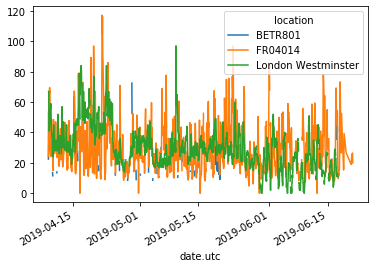

In [13]:
no2.pivot(columns="location", values="value").plot();

Если параметр index не определен, используется существующий индекс (метки строк).

Для получения дополнительной информации pivot() см. Раздел руководства пользователя по повороту объектов DataFrame .

### Сводная таблица

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/07_pivot_table.svg" height="500px" width="600px" >

Я хочу средние концентрации для NO2 и PM2.5 в каждой из станций в виде таблицы

In [14]:
air_quality.pivot_table(values="value", index="location",
                        columns="parameter", aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


В случае pivot(), данные только переставлены. Когда необходимо агрегировать несколько значений (в данном конкретном случае значения на разных временных шагах) pivot_table(), предоставляя функцию агрегации (например, среднее), как объединять эти значения.

Сводная таблица является хорошо известной концепцией в программах для работы с электронными таблицами. Если вас интересуют сводные столбцы для каждой переменной в отдельности, задайте margin параметр в True:

In [15]:
air_quality.pivot_table(values="value", index="location",
                        columns="parameter", aggfunc="mean",
                        margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


Для получения дополнительной информации pivot_table()см. Раздел руководства пользователя по сводным таблицам .

Если дело вас интересует, pivot_table()действительно напрямую связано с groupby(). Тот же результат может быть получен путем группировки на обоих , parameter и location:

air_quality.groupby(["parameter", "location"]).mean()

Посмотрите groupby() в сочетании с unstack() в направляющей секции пользователя на комбинируя статистику и GroupBy .

### Широкий к длинному формату

Начиная снова с широкоформатной таблицы, созданной в предыдущем разделе:

In [16]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

In [17]:
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/07_melt1.svg" height="500px" width="600px" >

Я хочу собрать все качество воздуха NO2 измерения в одном столбце (длинный формат)

In [18]:
no_2 = no2_pivoted.melt(id_vars="date.utc")

In [19]:
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


Метод pandas.melt() на DataFrame преобразует таблицу данных из широкого формата в длинный формат. Заголовки столбцов становятся именами переменных во вновь созданном столбце.

Решением является краткая версия о том, как подать заявку pandas.melt(). Метод будет плавиться все столбцы не упоминается в id_vars вместе в две колонки: колонки A с именами заголовков столбцов и столбца с самим значениями. Последний столбец получает имя по умолчанию value.

Метод pandas.melt() может быть определено более подробно:

In [20]:
no_2 = no2_pivoted.melt(id_vars="date.utc",
                        value_vars=["BETR801",
                                    "FR04014",
                                    "London Westminster"],
                        value_name="NO_2",
                        var_name="id_location")

In [21]:
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


Результат такой же, но более детально определенный:

value_vars четко определяет, какие столбцы смешивать вместе

value_name предоставляет настраиваемое имя столбца для столбца значений вместо имени столбца по умолчанию value

var_nameпредоставляет настраиваемое имя столбца для столбцов, собирающих имена заголовков столбцов. В противном случае он принимает имя индекса или значение по умолчанию variable

Следовательно, аргументы value_name и var_name являются просто пользовательскими именами для двух сгенерированных столбцов. Столбцы для плавления определяются id_vars и value_vars.

Преобразование из широкого формата в длинный с pandas.melt()объясняется в разделе руководства пользователя по изменению формы расплавом .

Полный обзор доступен в руководстве пользователя на страницах об изменении формы и повороте .